### Package Import

In [1]:
import requests
import time
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_curve, auc

%matplotlib inline

### Data Import and Cleaning

In [2]:
df = pd.read_csv('linguistics and languagelearning_2019-04-07 10:32:14.262909')

In [3]:
df.columns

Index(['Unnamed: 0', 'author', 'author_cakeday',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'author_flair_type',
       'author_fullname', 'author_patreon_flair', 'banned_by', 'can_mod_post',
       'contest_mode', 'created_utc', 'crosspost_parent',
       'crosspost_parent_list', 'domain', 'full_link', 'gilded', 'gildings',
       'id', 'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_css_class',
       'link_flair_richtext', 'link_flair_template_id', 'link_flair_text',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media',
       'media_embed', 'media_metadata', 'media_only', 'no_follow',
       'num_comments', 'num_crossposts', 'over_18', 'parent_whitelist_status',
       'permalink', 'pinned', 'post_h

In [4]:
key_columns= ['author','created_utc','num_comments','permalink',
              'score','selftext','subreddit','title'
             ]

In [5]:
df.drop(df.columns.difference(key_columns), 1, inplace=True)

In [6]:
df.head()

,author,created_utc,num_comments,permalink,score,selftext,subreddit,title
0,omgitsjustturtles,1554641308,0,/r/languagelearning/comments/bafwgj/language_t...,1,Yesterday I was listening to the baseball game...,languagelearning,Language through immersion
1,Jimral,1554640400,2,/r/languagelearning/comments/bafsh2/hebrew_aud...,1,Any good ones out there?,languagelearning,Hebrew audio coutrse
2,aadrita__,1554639896,9,/r/languagelearning/comments/bafqcl/name_two_l...,1,I'm just going to start of by apologising in c...,languagelearning,Name two languages that use the same alphabet
3,redditnojam,1554639696,1,/r/languagelearning/comments/bafpid/korean_wor...,1,https://youtu.be/WenSqRd8kx8\n\n\n1. 망토 (cape)...,languagelearning,Korean words borrowed from French
4,CherryBlackEyes,1554637024,1,/r/languagelearning/comments/bafec3/dash_or_co...,1,Here is a paragraph in a report which I am wri...,languagelearning,dash or comma?


In [7]:
df.isnull().sum()

author            0
created_utc       0
num_comments      0
permalink         0
score             0
selftext        650
subreddit         0
title             0
dtype: int64

In [8]:
df[df['subreddit'] == 'linguistics'].isnull().sum()

author            0
created_utc       0
num_comments      0
permalink         0
score             0
selftext        295
subreddit         0
title             0
dtype: int64

In [9]:
df[df['subreddit'] == 'languagelearning'].isnull().sum()

author            0
created_utc       0
num_comments      0
permalink         0
score             0
selftext        355
subreddit         0
title             0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [ ]:
df['subreddit'] = df['subreddit'].map({'linguistics':1,'languagelearning':0})

### EDA

<Figure size 432x288 with 0 Axes>

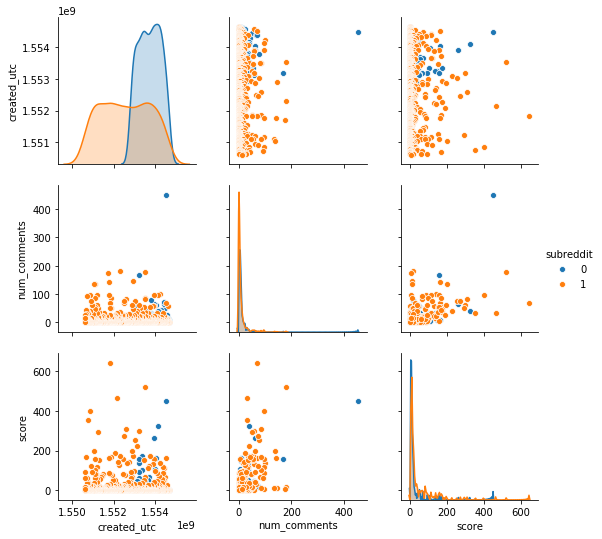

In [156]:
plt.figure();
sns.pairplot(df, x_vars=['created_utc','num_comments','score'],
             y_vars=['created_utc','num_comments','score'],
             hue='subreddit'
            );

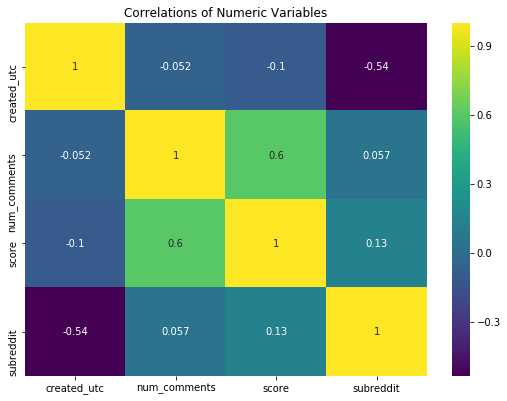

In [148]:
plt.figure(figsize=(9,6.5))
sns.heatmap(df.corr(), annot=True, cmap='viridis');
plt.title('Correlations of Numeric Variables');

#### Variable Assignment and Train Test Split

In [12]:
X = df['selftext']
y = df['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### Initial Vectorizer
To start, I decided to use a CountVectorizer to separate out the content of the posts for analysis because it is more easily interpretable.

In [229]:
vectorizer = CountVectorizer(analyzer = "word",
                             max_features = 1000
                            ) 

In [230]:
train_features = vectorizer.fit_transform(X_train)
test_features = vectorizer.transform(X_test)
train_features = train_features.toarray()
test_features = test_features.toarray()

#### Logistic Regression

In [231]:
logreg = LogisticRegression()

In [232]:
logreg.fit(train_features, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [233]:
logreg.score(train_features, y_train)

0.9871541501976284

In [234]:
logreg.score(test_features, y_test)

0.8195266272189349

In [235]:
pred_vlog = logreg.predict(test_features)

In [236]:
pred_vlog.sum()

184

In [237]:
confusion_matrix(y_test, pred_vlog)

array([[127,  34],
       [ 27, 150]])

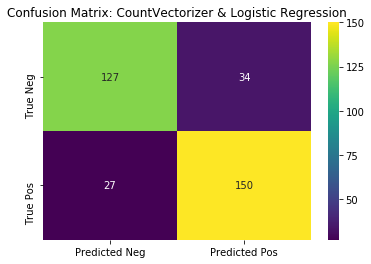

In [238]:
sns.heatmap(confusion_matrix(y_test, pred_vlog), 
            annot=True, fmt='g', cmap='viridis', 
            xticklabels=['Predicted Neg','Predicted Pos'],
            yticklabels=['True Neg','True Pos']
           );
plt.title('Confusion Matrix: CountVectorizer & Logistic Regression');

#### Naive Bayes

In [239]:
nb_vect = MultinomialNB()

In [240]:
nb_vect.fit(train_features, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [241]:
nb_vect.score(train_features, y_train)

0.8745059288537549

In [242]:
nb_vect.score(test_features, y_test)

0.849112426035503

In [243]:
nb_vect_preds = nb_vect.predict(test_features)

In [244]:
confusion_matrix(y_test, nb_vect_preds)

array([[134,  27],
       [ 24, 153]])

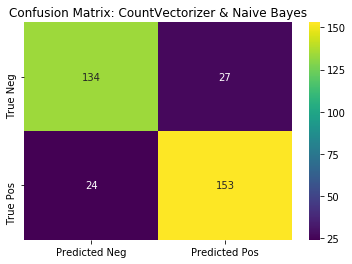

In [245]:
sns.heatmap(confusion_matrix(y_test, nb_vect_preds), 
            annot=True, fmt='g', cmap='viridis', 
            xticklabels=['Predicted Neg','Predicted Pos'],
            yticklabels=['True Neg','True Pos']
           );
plt.title('Confusion Matrix: CountVectorizer & Naive Bayes');

#### Coefficients and Words

In [246]:
vocab = vectorizer.get_feature_names()
coef_log  = logreg.coef_[0]
coef_nb_vect = nb_vect.coef_[0]

In [247]:
word_coef = pd.DataFrame(columns= ['word','coef_log','coef_nb'])
word_coef['word'] = vocab
word_coef['coef_log'] = coef_log
word_coef['coef_nb'] = coef_nb_vect

In [248]:
word_coef.sort_values('coef_log', ascending=False).tail(20)

,word,coef_log,coef_nb
405,improve,-0.754883,-9.213959
458,learned,-0.757520,-7.892203
360,happy,-0.757603,-8.202358
239,each,-0.774650,-7.166266
185,countries,-0.779477,-8.520812
2,10,-0.785569,-8.520812
36,already,-0.789205,-8.035304
241,easier,-0.789978,-8.520812
457,learn,-0.825139,-6.688230
597,order,-0.847582,-7.268049


In [249]:
word_coef.sort_values('coef_log', ascending=False).head(20)

,word,coef_log,coef_nb
477,linguistics,2.058772,-5.709904
423,ipa,0.947227,-7.464759
189,create,0.839364,-7.767040
150,come,0.822442,-6.936692
130,change,0.814166,-7.166266
323,general,0.794598,-6.771612
274,explain,0.791427,-7.655814
706,say,0.788320,-5.936814
733,short,0.788292,-7.199056
476,linguistic,0.787974,-7.304416


### TF_IDF

In [181]:
tfidf = TfidfVectorizer(stop_words='english')

In [182]:
train_tfidf = tfidf.fit_transform(X_train)
test_tfidf = tfidf.transform(X_test)
train_tfidf = train_tfidf.toarray()
test_tfidf = test_tfidf.toarray()

#### Logistic

In [183]:
logreg_tfidf = LogisticRegression()

In [184]:
logreg_tfidf.fit(train_tfidf, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [185]:
logreg_tfidf.score(train_tfidf, y_train)

0.9446640316205533

In [186]:
logreg_tfidf.score(test_tfidf, y_test)

0.8579881656804734

In [187]:
log_tfidf_preds = logreg_tfidf.predict(test_tfidf)

In [188]:
confusion_matrix(y_test, log_tfidf_preds)

array([[124,  37],
       [ 11, 166]])

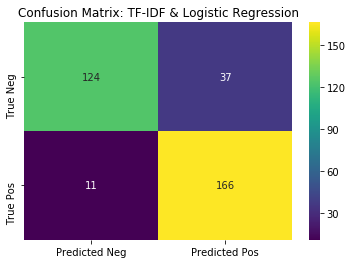

In [189]:
sns.heatmap(confusion_matrix(y_test, log_tfidf_preds), 
            annot=True, fmt='g', cmap='viridis', 
            xticklabels=['Predicted Neg','Predicted Pos'],
            yticklabels=['True Neg','True Pos']
           );
plt.title('Confusion Matrix: TF-IDF & Logistic Regression');

#### Naive Bayes

In [190]:
nb_tfidf = MultinomialNB()

In [191]:
nb_tfidf.fit(train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [192]:
nb_tfidf.score(train_tfidf, y_train)

0.967391304347826

In [193]:
nb_tfidf.score(test_tfidf, y_test)

0.8727810650887574

In [194]:
nb_tfidf_preds = nb_tfidf.predict(test_tfidf)

In [195]:
confusion_matrix(y_test, nb_tfidf_preds)

array([[144,  17],
       [ 26, 151]])

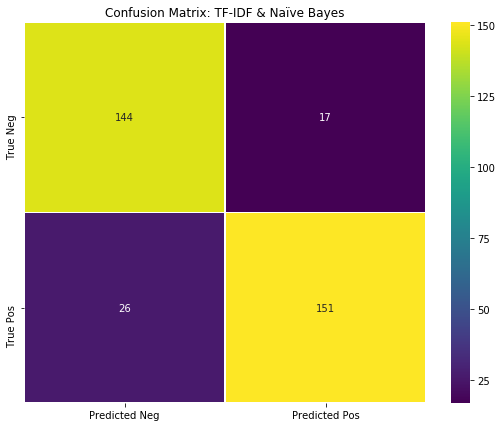

In [205]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test, nb_tfidf_preds), 
            annot=True, fmt='g', cmap='viridis',
            linewidths=0.5,
            xticklabels=['Predicted Neg','Predicted Pos'],
            yticklabels=['True Neg','True Pos']
           );
plt.title('Confusion Matrix: TF-IDF & Naïve Bayes');

#### Coefficients and Words

In [197]:
vocab_tfidf = tfidf.get_feature_names()
coef_tfidf_log  = logreg_tfidf.coef_[0]
coef_tfidf_nb = nb_tfidf.coef_[0]

In [198]:
tfidf_coef = pd.DataFrame(columns= ['word','coef_log','coef_tfidf'])
tfidf_coef['word'] = vocab_tfidf
tfidf_coef['coef_log'] = coef_tfidf_log
tfidf_coef['coef_tfidf'] = coef_tfidf_nb

In [199]:
tfidf_coef.sort_values('coef_tfidf', ascending=False).head(10)

,word,coef_log,coef_tfidf
4643,languages,1.202318,-6.534865
2855,english,0.833954,-6.562000
4641,language,-1.586665,-6.590959
4771,like,-0.735527,-6.772883
4573,know,-0.501561,-6.881333
8536,ve,-0.732965,-6.930078
750,amp,-0.100400,-6.968504
8796,word,0.611174,-7.004619
4796,linguistics,2.237858,-7.023198
8798,words,0.484622,-7.045713


In [200]:
tfidf_coef.sort_values('coef_tfidf', ascending=False).tail(10)

,word,coef_log,coef_tfidf
4218,initially,-0.005377,-9.363585
4209,infrequent,-0.022227,-9.363585
4170,indispensables,-0.030626,-9.363585
4190,infinite,-0.002222,-9.363585
4189,inferred,-0.029805,-9.363585
4188,inferior,-0.008537,-9.363585
4181,ineffective,-0.095815,-9.363585
4180,ine,-0.002222,-9.363585
4179,industry,-0.008537,-9.363585
9043,피망,-0.045533,-9.363585


### Pipeline for GridSearch Optimization
(Some code adapted from lesson 5.06)
<br>GridSearch through various models and parameters did not find any improvement on the standard parameters for MultinomialNB and TfidfVectorizer with English stop words.

In [171]:
pipe_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [173]:
pipe_params = {
    'tfidf__stop_words': [None, 'english'],
    'tfidf__ngram_range':[(1,1),(1,2)],
}
gs = GridSearchCV(pipe_vectorizer, param_grid=pipe_params, cv=3)
gs.fit(X_train, y_train);
print(gs.best_score_)
gs.best_params_

0.8409090909090909


{'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': 'english'}

### Results Visualization

In [134]:
fpr, tpr, thresholds = roc_curve(y_test, nb_tfidf_probs['one'])

In [120]:
nb_tfidf_probs = pd.DataFrame(nb_tfidf.predict_proba(test_tfidf), columns=['zero','one'])

The following code was adapted from the Scikit-Learn [website](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py):

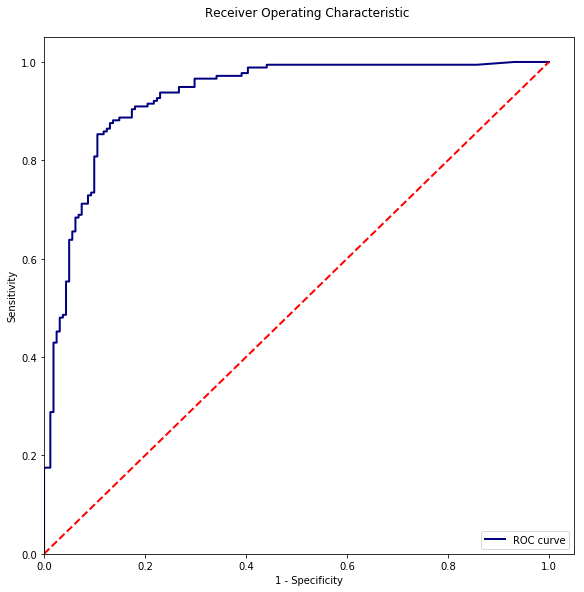

In [164]:
# Code adapted form 
plt.figure(figsize=(9.5,9.5))
lw = 2
plt.plot(fpr, tpr, color='navy',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic \n')
plt.legend(loc="lower right")
plt.show()

### BONUS: Constructed Languages 

**The following cell only needed to be run one time afterwhich the data were imported from a csv file:**

In [68]:
subreddit = 'conlangs'
posts = 1000
headers = {'user-micah':'my-user-micah'}
url = "https://api.pushshift.io/reddit/search/submission/?subreddit="+subreddit+"&size="+str(posts)
res = requests.get(url,headers=headers)
df_conlangs = pd.DataFrame(res.json()['data'])
df.to_csv('{}_'.format(subreddit)+str(datetime.datetime.now()))

In [55]:
# df_conlangs = pd.read_csv('conlangs_2019-04-07 19:49:40.224265')

In [69]:
df_conlangs.drop(df_conlangs.columns.difference(key_columns), 1, inplace=True)

In [70]:
df_conlangs.isnull().sum()

author          0
created_utc     0
num_comments    0
permalink       0
score           0
selftext        1
subreddit       0
title           0
dtype: int64

In [71]:
df_conlangs.dropna(inplace=True)

In [72]:
X_con = df_conlangs['selftext']

In [73]:
X_con_vect = vectorizer.transform(X_con)
X_con_vect = X_con_vect.toarray()

In [74]:
con_log_vect_preds = logreg.predict(X_con_vect)
con_log_vect_preds.mean()

0.6786786786786787

In [75]:
con_nb_vect_preds = nb_vect.predict(X_con_vect)
con_nb_vect_preds.mean()

0.7127127127127127

In [76]:
X_con_tfidf = tfidf.transform(X_con)
X_con_tfidf = X_con_tfidf.toarray()

In [77]:
con_log_preds = logreg_tfidf.predict(X_con_tfidf)
con_log_preds.mean()

0.7787787787787788

In [78]:
con_nb_tfidf_preds = nb_tfidf.predict(X_con_tfidf)
con_nb_tfidf_preds.mean()

0.7647647647647647